In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/weather1_education_train.csv', parse_dates=['timestamp'])

In [3]:
test = pd.read_csv('../data/weather1_education_test.csv', parse_dates=['timestamp'])

In [65]:
def naive_model(df, profile, num_buildings):
    '''
    profile is a list of features used to calculate hourly avg
    #profile = ['primary_space_usage']
    '''
    one_year = 8757
    profile.append('hour')
    hourly_avg = df.groupby(profile).mean()['electricity'].round(1).unstack()
    df_2 = pd.DataFrame(columns=['PrimClass', 'UnivClass'])
    hourly_avg = hourly_avg.transpose()
    for _ in range(365):
        df_2 = pd.concat([df_2, hourly_avg], axis=0, ignore_index=True)
    df_2 = df_2.iloc[:one_year]
    y_true = np.array(df['electricity']).reshape((num_buildings, one_year))
    buildings = df['building_name'].unique()
    y_pred = np.array([])
    profile.remove('hour')
    for building in buildings:
        building_profile = df[df['building_name']==building][profile].iloc[0]
        y = df_2[building_profile]
        y = np.array(y)
        y_pred = np.append(y_pred, y)
    return y_true, y_pred.reshape((num_buildings, one_year))

In [66]:
y, y_pred = naive_model(train, ['primary_space_usage'], 50)

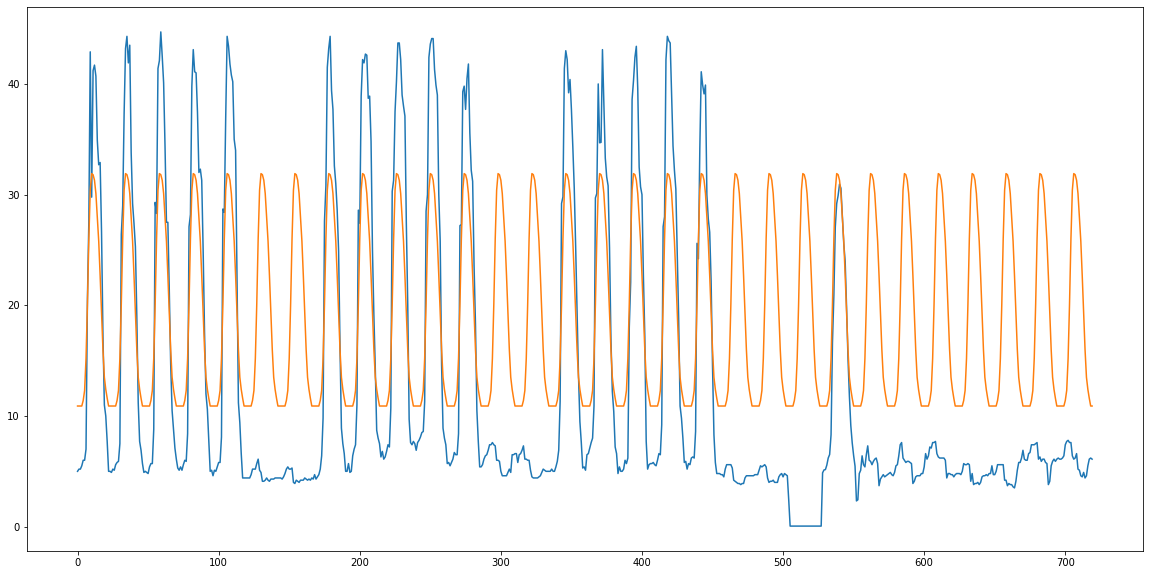

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(y[0][:24*30])
plt.plot(y_pred[0][:24*30]);

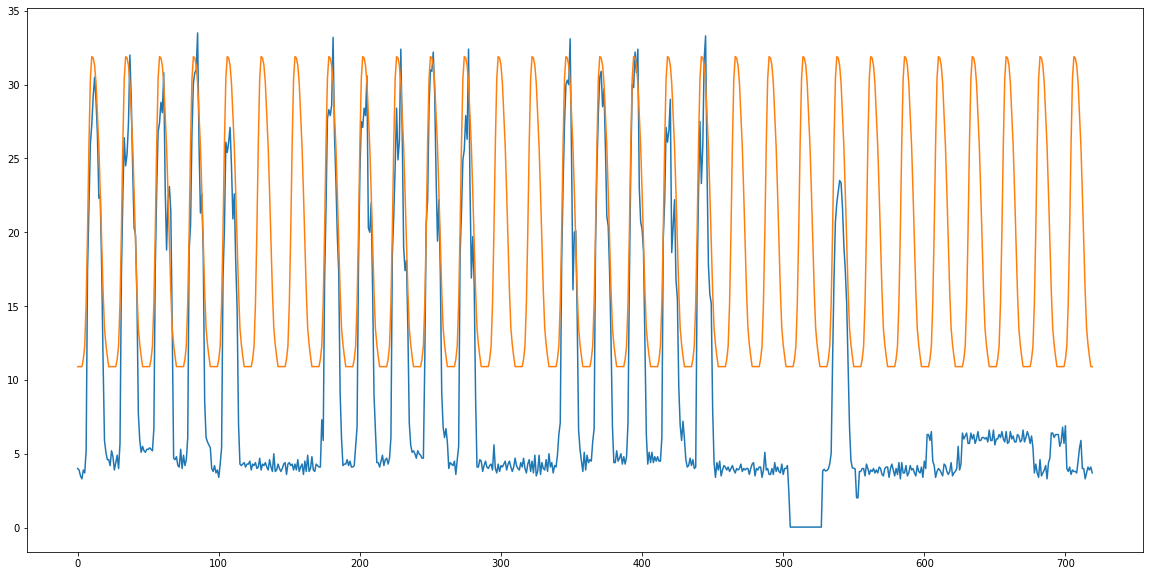

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(y[1][:24*30])
plt.plot(y_pred[1][:24*30]);

In [78]:
MSE = np.mean(np.square(y-y_pred))
MSE

855.2912888690553

In [77]:
MAE = np.mean(np.abs(y-y_pred))
MAE

17.60759949642459